In [1]:
%%capture
!pip install -Uqq fastai gradio
!apt-get install tree

In [2]:
from fastai.vision.all import *
from fastai import *
from torch import nn, optim
import torch

In [3]:
path = untar_data(URLs.PETS)
pat        = r'([^/]+)_\d+.*$'
fnames     = get_image_files(path/'images')
item_tfms  = [Resize(256, method='crop')]
batch_tfms = [*aug_transforms(size=224), Normalize.from_stats(*imagenet_stats)]
dls = ImageDataLoaders.from_name_re(path, fnames, pat, bs=64, item_tfms=item_tfms,
                                    batch_tfms=batch_tfms)

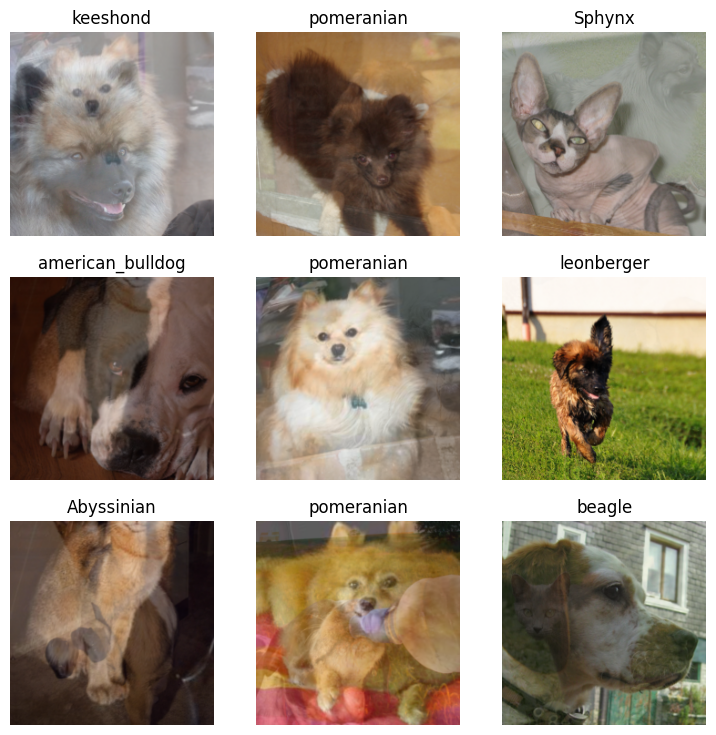

In [4]:
mixup = MixUp(1.)
with Learner(dls, nn.Linear(3,4), loss_func=CrossEntropyLossFlat(), cbs=mixup) as learn:
    learn.epoch,learn.training = 0,True
    learn.dl = dls.train
    b = dls.one_batch()
    learn._split(b)
    learn('before_train')
    learn('before_batch')

_,axs = plt.subplots(3,3, figsize=(9,9))
dls.show_batch(b=(mixup.x,mixup.y), ctxs=axs.flatten())

In [5]:
learn = vision_learner(dls, resnet18, loss_func=CrossEntropyLossFlat(), metrics=[error_rate])
learn.fit_one_cycle(1, cbs=mixup)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 213MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,2.947287,0.552818,0.150203,13:53


Now let`s implement Cutmix

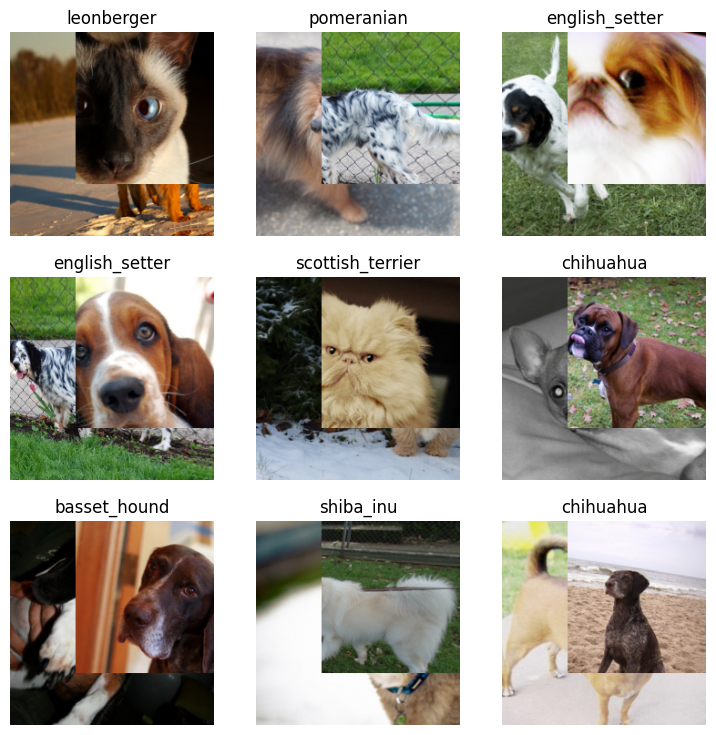

In [6]:
cutmix = CutMix(1.)
with Learner(dls, nn.Linear(3,4), loss_func=CrossEntropyLossFlat(), cbs=cutmix) as learn:
    learn.epoch,learn.training = 0,True
    learn.dl = dls.train
    b = dls.one_batch()
    learn._split(b)
    learn('before_train')
    learn('before_batch')

_,axs = plt.subplots(3,3, figsize=(9,9))
dls.show_batch(b=(cutmix.x,cutmix.y), ctxs=axs.flatten())

In [7]:
learn = vision_learner(dls, resnet18, loss_func=CrossEntropyLossFlat(), metrics=[accuracy, error_rate])
learn.fit_one_cycle(1, cbs=cutmix)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.225404,0.594334,0.844384,0.155616,13:57
